In [3]:
from PIL import Image
import numpy as np

In [4]:
def ft_load(path : str) -> np.ndarray:
    try:
        if not isinstance(path, str):
            raise TypeError
        if path == '':
            raise ValueError
        img = Image.open(path)
        imgArray = np.array(img)
        print(f"The shape of image is: {imgArray.shape}")
        return imgArray
    except PermissionError:
        print('Error: permission denied')
    except TypeError:
        print('Error: path must be a string')
    except ValueError:
        print('Error: path must not be empty')

In [5]:
import matplotlib.pyplot as plt

In [6]:
def zoom(img_arr: np.ndarray, zoom: int | float, start_px: tuple = (0, 0)) -> list:
    """
    @param img_arr: numpy.ndarray
    @param zoom: int | float
    @param start_px: tuple
    @return: list

    This function takes an image array and zooms in on a specific area of the image. The function takes the image array
    """
    try:
        if img_arr is None:
            raise TypeError
        if not isinstance(img_arr, np.ndarray):
            raise TypeError
        if not isinstance(zoom, (int, float)):
            raise TypeError
        if not isinstance(start_px, tuple):
            raise TypeError
        if not all([isinstance(x, int) for x in start_px]):
            raise TypeError
        if not all([x >= 0 for x in start_px]):
            raise ValueError
        if zoom < 1:
            raise ValueError
        if len(img_arr.shape) != 3:
            raise ValueError
        if img_arr.shape[2] != 3:
            raise ValueError
        if not all([isinstance(x, int) for x in img_arr.shape]):
            raise ValueError
        if not all([x >= 0 for x in img_arr.shape]):
            raise ValueError
        height, width, color = img_arr.shape
        new_dimension = min(height, width)
        new_height = int(new_dimension / zoom)
        new_width = int(new_dimension / zoom)
        left, upper = start_px
        right = left + new_width
        lower = upper + new_height
        if right > width or lower > height:
            raise ValueError
        zoomed_img = img_arr[upper:lower, left:right, 0:1]
        print(f"New shape after slicing: {zoomed_img.shape} or ({zoomed_img.shape[0]}, {zoomed_img.shape[1]})")
        return zoomed_img
    except ValueError:
        print("Error: invalid input value")
        return None
    except TypeError:
        print("Error: invalid input type")
        return None



def main():
    try:
        img_arr = ft_load('animal.jpeg')
        print(img_arr)
        zoomed = zoom(img_arr, 1.92, (450, 100))
        if zoomed is None:
            return
        print(zoomed)
        plt.imshow(zoomed, cmap='gray')
        plt.show()
    except KeyboardInterrupt:
        plt.close()
    except Exception as e:
        print(e)

The shape of image is: (768, 1024, 3)
[[[120 111 132]
  [139 130 151]
  [155 146 167]
  ...
  [120 127  73]
  [131 136  82]
  [138 143  89]]

 [[ 87  78  99]
  [111 102 123]
  [132 123 144]
  ...
  [117 124  70]
  [135 142  88]
  [148 155 101]]

 [[ 72  65  83]
  [ 96  89 107]
  [117 109 130]
  ...
  [116 125  70]
  [134 143  86]
  [146 155  98]]

 ...

 [[ 88 105  73]
  [ 93 110  78]
  [108 125  93]
  ...
  [120 159  96]
  [119 158  93]
  [119 158  93]]

 [[ 85 100  71]
  [ 96 111  80]
  [113 128  97]
  ...
  [121 157  95]
  [120 156  92]
  [119 155  91]]

 [[ 86 101  72]
  [ 98 113  84]
  [112 127  96]
  ...
  [120 156  94]
  [119 154  90]
  [118 153  89]]]
New shape after slicing: (400, 400, 1) or (400, 400)
[[[167]
  [180]
  [194]
  ...
  [ 64]
  [ 50]
  [ 72]]

 [[161]
  [171]
  [184]
  ...
  [ 77]
  [ 77]
  [ 88]]

 [[163]
  [170]
  [178]
  ...
  [ 82]
  [ 95]
  [ 94]]

 ...

 [[105]
  [112]
  [122]
  ...
  [102]
  [105]
  [105]]

 [[114]
  [114]
  [126]
  ...
  [103]
  [104]
  [

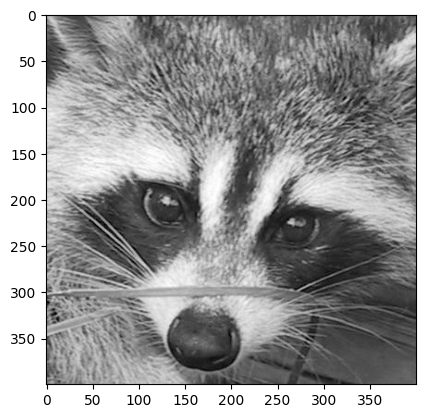

In [8]:
if __name__ == "__main__":
    main()